In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [2]:
image = cv2.imread("image.png")
image_array = image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [5]:
kmeans.fit(image_array)

KMeans(n_clusters=4, n_init=10, random_state=42)

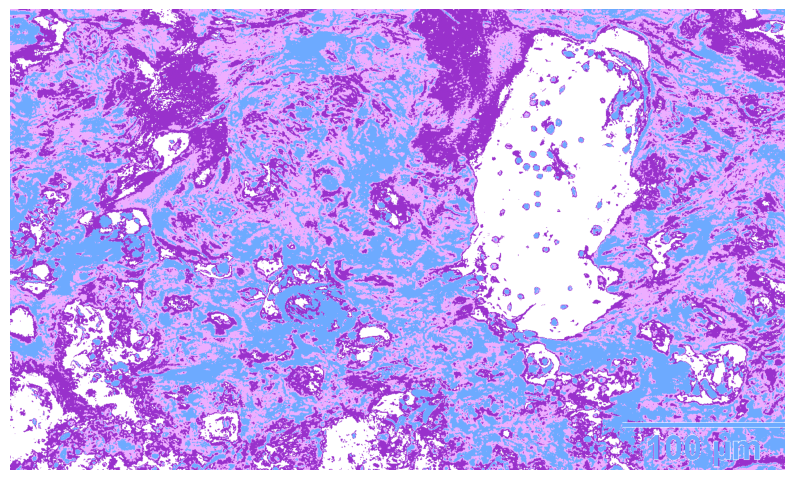

In [6]:
color_map = {
    2: np.array([0.6, 0.196, 0.8]),
    0: np.array([1, 1, 1]),
    1: np.array([0.43, 0.67, 1.0]),
    3: np.array([0.93, 0.68, 1]), 
}

data_reshaped = kmeans.labels_.reshape(image.shape[0], image.shape[1])
data_colorcoded = np.ndarray(
    shape=(
        data_reshaped.shape[0],
        data_reshaped.shape[1],
        3,
    ),
    dtype=float,
)
for i in range(0, data_reshaped.shape[0]):
    for j in range(0, data_reshaped.shape[1]):
        data_colorcoded[i][j] = color_map[data_reshaped[i][j]]

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(data_colorcoded)